In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\Laliga_matches.csv")

In [3]:
df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Valencia,Getafe,1,0,H,4,22,2,4,24,15,1,9,6,3,1,1
1,Cadiz,Levante,1,1,D,7,12,2,3,10,16,2,4,1,5,0,0
2,Mallorca,Betis,1,1,D,6,10,2,1,12,18,4,3,1,3,0,0
3,Alaves,Real Madrid,1,4,A,11,19,4,7,14,10,0,4,1,2,0,0
4,Osasuna,Espanol,0,0,D,14,10,1,3,18,12,4,6,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,Granada,Ath Madrid,0,0,D,2,3,0,1,9,11,4,0,0,0,0,0
3036,Levante,Elche,0,0,D,8,15,0,6,14,15,4,4,3,3,0,0
3037,Malaga,Sevilla,2,3,A,16,12,8,6,13,9,6,1,3,2,1,0
3038,Real Madrid,Getafe,7,3,H,18,14,11,6,12,13,8,7,2,3,0,0


In [4]:
df=df.drop(["HF","AF","HC","AC","HY","AY","HR","AR"],axis=1)

In [5]:
df.isnull().sum()

HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HS          0
AS          0
HST         0
AST         0
dtype: int64

In [6]:
df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST
0,Valencia,Getafe,1,0,H,4,22,2,4
1,Cadiz,Levante,1,1,D,7,12,2,3
2,Mallorca,Betis,1,1,D,6,10,2,1
3,Alaves,Real Madrid,1,4,A,11,19,4,7
4,Osasuna,Espanol,0,0,D,14,10,1,3
...,...,...,...,...,...,...,...,...,...
3035,Granada,Ath Madrid,0,0,D,2,3,0,1
3036,Levante,Elche,0,0,D,8,15,0,6
3037,Malaga,Sevilla,2,3,A,16,12,8,6
3038,Real Madrid,Getafe,7,3,H,18,14,11,6


In [7]:
corr=df.corr

In [8]:
win_perc=(len(df.loc[df["FTR"]=="H"])/df.shape[0])*100
print("Total Number of Matches =",df.shape[0])
print("Number of matches won by home teams =",len(df.loc[df["FTR"]=="H"]))
print("Win % of home teams =",win_perc)

Total Number of Matches = 3040
Number of matches won by home teams = 1379
Win % of home teams = 45.36184210526316


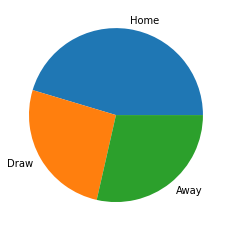

In [9]:
plt.pie([(len(df.loc[df["FTR"]=="H"])/df.shape[0])*100,(len(df.loc[df["FTR"]=="D"])/df.shape[0])*100,(len(df.loc[df["FTR"]=="A"])/df.shape[0])*100],labels=["Home","Draw","Away"])
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
lbl.fit(list(df["HomeTeam"].values))
df["HomeTeam_Code"]=lbl.transform(list(df["HomeTeam"].values))
df["AwayTeam_Code"]=lbl.transform(list(df["AwayTeam"].values))
lbl2=LabelEncoder()
lbl2.fit(list(df["FTR"].values))
df["FTR"]=lbl2.transform(list(df["FTR"].values))

from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='median')
imp.fit(df)
df=pd.DataFrame(data=imp.transform(df),columns=df.columns)

In [11]:
df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HomeTeam_Code,AwayTeam_Code
0,Valencia,Getafe,1,0,2,4,22,2,4,27,12
1,Cadiz,Levante,1,1,1,7,12,2,3,6,19
2,Mallorca,Betis,1,1,1,6,10,2,1,21,5
3,Alaves,Real Madrid,1,4,0,11,19,4,7,0,23
4,Osasuna,Espanol,0,0,1,14,10,1,3,22,11
...,...,...,...,...,...,...,...,...,...,...,...
3035,Granada,Ath Madrid,0,0,1,2,3,0,1,14,3
3036,Levante,Elche,0,0,1,8,15,0,6,19,10
3037,Malaga,Sevilla,2,3,0,16,12,8,6,20,24
3038,Real Madrid,Getafe,7,3,2,18,14,11,6,23,12


In [12]:
df.dtypes

HomeTeam         object
AwayTeam         object
FTHG              int64
FTAG              int64
FTR               int32
HS                int64
AS                int64
HST               int64
AST               int64
HomeTeam_Code     int32
AwayTeam_Code     int32
dtype: object

In [13]:
def calc_projected_goals_full(home,away):
    #total_avg_home_goals=df["FTHG"].mean()
    #total_avg_away_goals=df["FTAG"].mean()
    total_avg_goals_by_home=(df["FTHG"].loc[df.HomeTeam_Code==home].mean()+df["FTAG"].loc[df.AwayTeam_Code==home].mean())
    total_avg_goals_by_away=(df["FTHG"].loc[df.HomeTeam_Code==away].mean()+df["FTAG"].loc[df.AwayTeam_Code==away].mean())
    avg_home_goal_at_home=df["FTHG"].loc[df.HomeTeam_Code==home].mean()
    avg_away_goal_conceded_at_away=df["FTHG"].loc[df.AwayTeam_Code==away].mean()
    avg_away_goal_at_away=df["FTAG"].loc[df.AwayTeam_Code==away].mean()
    avg_home_goal_conceded_at_home=df["FTAG"].loc[df.HomeTeam_Code==home].mean()
    home_attack=avg_home_goal_at_home/total_avg_goals_by_home
    away_defense=avg_away_goal_conceded_at_away/total_avg_goals_by_home
    away_attack=avg_away_goal_at_away/total_avg_goals_by_away
    home_defense=avg_home_goal_conceded_at_home/total_avg_goals_by_away
    #PHG=home_attack*away_defense*total_avg_home_goals
    #PAG=away_attack*home_defense*total_avg_away_goals
    PHG=home_attack*away_defense*total_avg_goals_by_home
    PAG=away_attack*home_defense*total_avg_away_goals
    return [PHG,PAG]
def calc_projected_goals_one(home,away):
    #total_avg_home_goals=df["FTHG"].loc[0:380].mean()
    #total_avg_away_goals=df["FTAG"].loc[0:380].mean()
    total_avg_goals_by_home=(df["FTHG"].loc[df.HomeTeam_Code==home].loc[0:380].mean()+df["FTAG"].loc[df.AwayTeam_Code==home].loc[0:380].mean())
    total_avg_goals_by_away=(df["FTHG"].loc[df.HomeTeam_Code==away].loc[0:380].mean()+df["FTAG"].loc[df.AwayTeam_Code==away].loc[0:380].mean())
    avg_home_goal_at_home=df["FTHG"].loc[df.HomeTeam_Code==home].loc[0:380].mean()
    avg_away_goal_conceded_at_away=df["FTHG"].loc[df.AwayTeam_Code==away].loc[0:380].mean()
    avg_away_goal_at_away=df["FTAG"].loc[df.AwayTeam_Code==away].loc[0:380].mean()
    avg_home_goal_conceded_at_home=df["FTAG"].loc[df.HomeTeam_Code==home].loc[0:380].mean()
    home_attack=avg_home_goal_at_home/total_avg_goals_by_home
    away_defense=avg_away_goal_conceded_at_away/total_avg_goals_by_home
    away_attack=avg_away_goal_at_away/total_avg_goals_by_away
    home_defense=avg_home_goal_conceded_at_home/total_avg_goals_by_away
    #PHG=home_attack*away_defense*total_avg_home_goals
    #PAG=away_attack*home_defense*total_avg_away_goals
    PHG=home_attack*away_defense*total_avg_goals_by_home
    PAG=away_attack*home_defense*total_avg_away_goals
    return [PHG,PAG]

In [14]:
total_avg_home_goals=df["FTHG"].mean()
total_avg_away_goals=df["FTAG"].mean()
df["Projected_Home_Goals"]=0
df["Projected_Away_Goals"]=0
for i in range(len(df)):
    df["Projected_Home_Goals"].loc[i]=calc_projected_goals_full(df.loc[i]["HomeTeam_Code"],df.loc[i]["AwayTeam_Code"])[0]
    df["Projected_Away_Goals"].loc[i]=calc_projected_goals_full(df.loc[i]["HomeTeam_Code"],df.loc[i]["AwayTeam_Code"])[1]

C:\Users\Dell\AppData\Local\Temp\ipykernel_13896\1130475753.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Projected_Home_Goals"].loc[i]=calc_projected_goals_full(df.loc[i]["HomeTeam_Code"],df.loc[i]["AwayTeam_Code"])[0]
C:\Users\Dell\AppData\Local\Temp\ipykernel_13896\1130475753.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Projected_Away_Goals"].loc[i]=calc_projected_goals_full(df.loc[i]["HomeTeam_Code"],df.loc[i]["AwayTeam_Code"])[1]


In [15]:
df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HomeTeam_Code,AwayTeam_Code,Projected_Home_Goals,Projected_Away_Goals
0,Valencia,Getafe,1,0,2,4,22,2,4,27,12,0.880535,0.244208
1,Cadiz,Levante,1,1,1,7,12,2,3,6,19,0.953087,0.283893
2,Mallorca,Betis,1,1,1,6,10,2,1,21,5,0.912643,0.235275
3,Alaves,Real Madrid,1,4,0,11,19,4,7,0,23,0.571207,0.124274
4,Osasuna,Espanol,0,0,1,14,10,1,3,22,11,0.895348,0.355036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,Granada,Ath Madrid,0,0,1,2,3,0,1,14,3,0.451719,0.199971
3036,Levante,Elche,0,0,1,8,15,0,6,19,10,0.954209,0.386651
3037,Malaga,Sevilla,2,3,0,16,12,8,6,20,24,0.893361,0.173726
3038,Real Madrid,Getafe,7,3,2,18,14,11,6,23,12,0.836243,0.192548


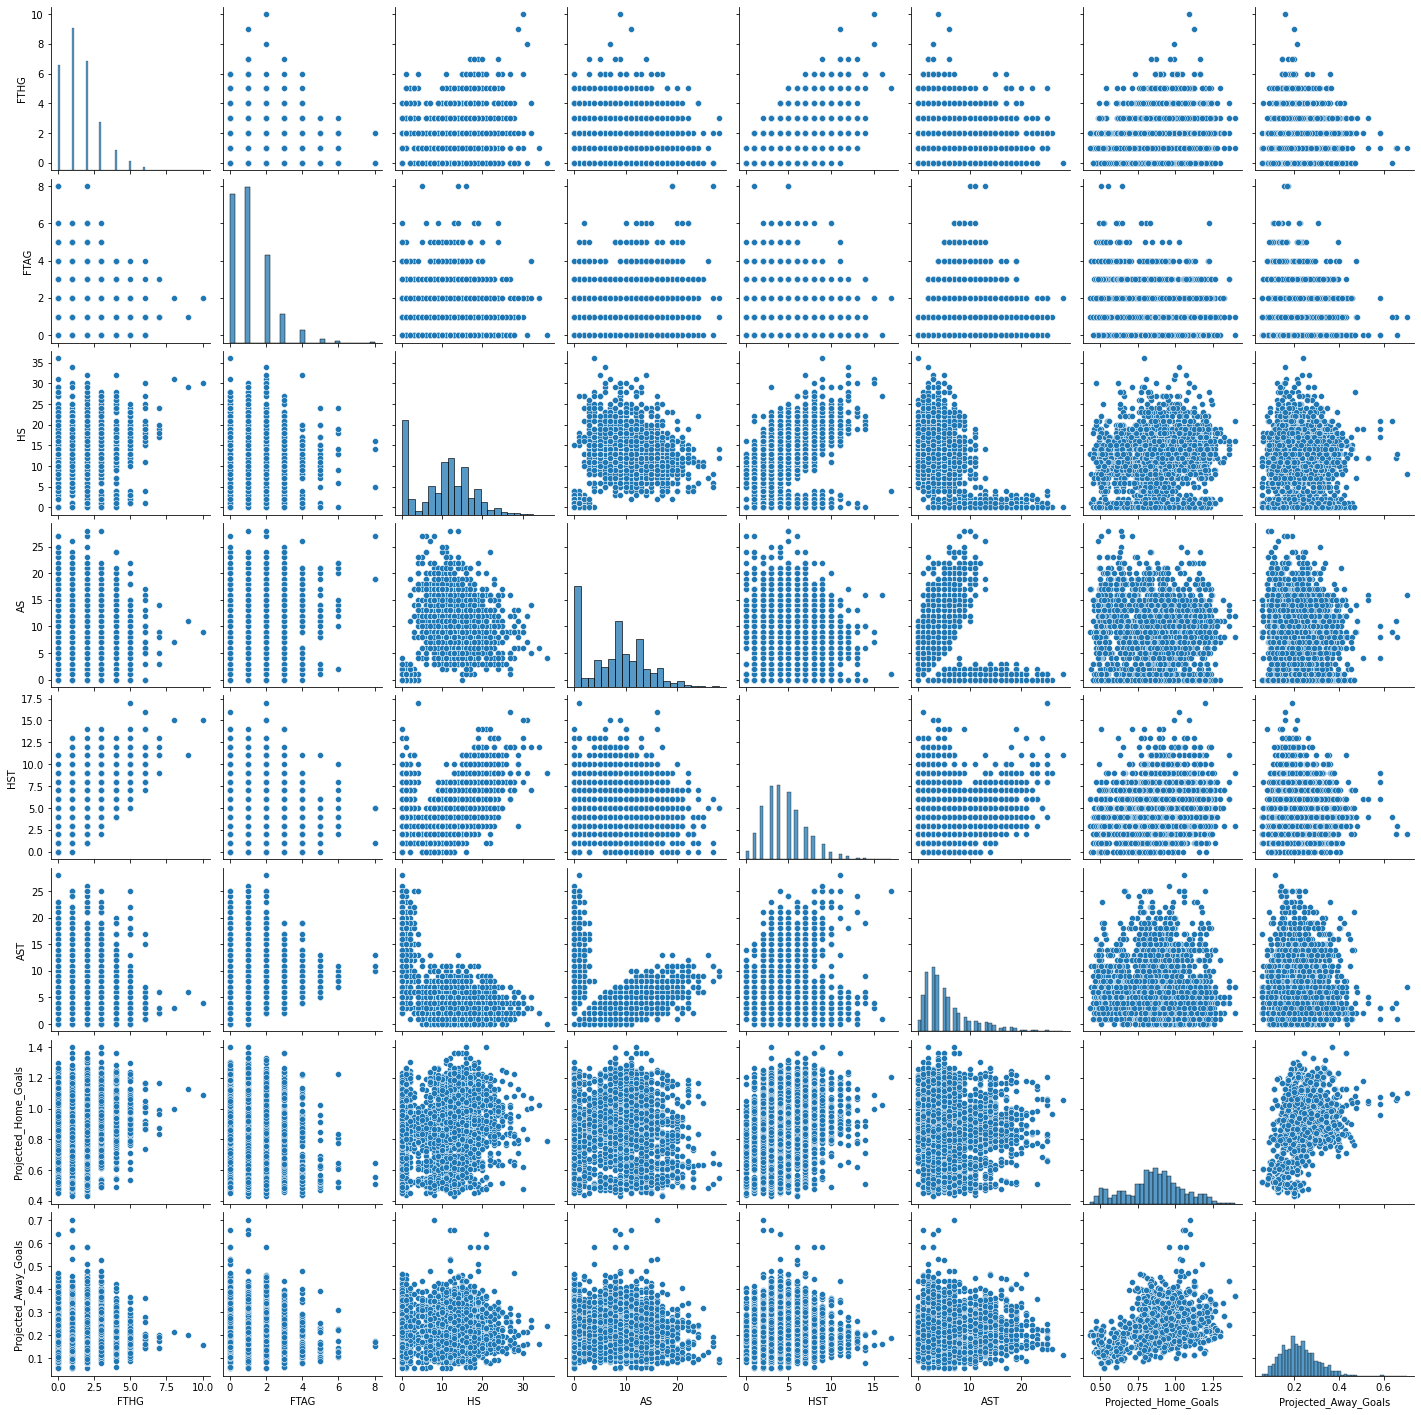

In [16]:
sns.pairplot(df[["FTHG","FTAG","HS","AS","HST","AST","Projected_Home_Goals","Projected_Away_Goals"]])

In [17]:
#x=df.drop(["FTR","HomeTeam","AwayTeam","FTHG","FTAG"],axis=1)
x1=df.drop(["HomeTeam","AwayTeam","FTHG","FTAG","FTR"],axis=1)
y1=df["FTHG"]
from sklearn.model_selection import train_test_split

In [18]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
model_homegoals=RandomForestRegressor(n_estimators=399)
model_homegoals.fit(x1_train,y1_train)

RandomForestRegressor(n_estimators=399)

In [20]:
model_homegoals.score(x1_test,y1_test)

0.42351673262744605

In [21]:
model_homegoals.score(x1_train,y1_train)

0.915495391914951

In [22]:
x2=df.drop(["HomeTeam","AwayTeam","FTHG","FTAG","FTR"],axis=1)
y2=df["FTAG"]
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=20)
model_awaygoals=RandomForestRegressor(n_estimators=250)
model_awaygoals.fit(x2_train,y2_train)

RandomForestRegressor(n_estimators=250)

In [23]:
model_awaygoals.score(x2_test,y2_test)

0.3643188760324303

In [24]:
model_awaygoals.score(x2_train,y2_train)

0.911356756183306

In [25]:
x=df[["FTHG","FTAG","HomeTeam_Code","AwayTeam_Code"]]
y=df["FTR"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression(penalty="l2")
model_1.fit(x_train,y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model_1.score(x_test,y_test)

1.0

In [27]:
model_1.score(x_train,y_train)

1.0

In [28]:
def get_stats(home,away):
    data=pd.DataFrame({"HS":[df["HS"].loc[df.HomeTeam_Code==home].loc[0:380].mean()],
                       "AS":[df["AS"].loc[df.AwayTeam_Code==away].loc[0:380].mean()],
                       "HST":[df["HST"].loc[df.HomeTeam_Code==home].loc[0:380].mean()],
                       "AST":[df["AST"].loc[df.AwayTeam_Code==away].loc[0:380].mean()],
                       "HomeTeam_Code":[home],
                       "AwayTeam_Code":[away],
                       "Projected_Home_Goals":[calc_projected_goals_one(home,away)[0]],
                       "Projected_Away_Goals":[calc_projected_goals_one(home,away)[1]]})
    data=data.replace(np.nan,0)
    return data

In [29]:
def get_other_stats(home,away):
    goal1=df["FTHG"].loc[(df.HomeTeam_Code==home) & (df.AwayTeam_Code==away)].replace(np.nan,0)
    goal2=df["FTAG"].loc[(df.HomeTeam_Code==home) & (df.AwayTeam_Code==away)].replace(np.nan,0)
    goal1=goal1.mean()
    goal2=goal2.mean()
    if goal1 is np.nan:
        goal1=0
    if goal2 is np.nan:
        goal2=0
    data=pd.DataFrame({"FTHG":round((model_homegoals.predict(get_stats(home,away))[0]+goal1)/2),
                       "FTAG":round((model_awaygoals.predict(get_stats(home,away))[0]+goal2)/2),
                       "HomeTeam_Code":[home],
                       "AwayTeam_Code":[away]})
    return data

In [30]:
vals={0:"A",1:"D",2:"H"}
#dic={"HomeTeam_Code":lbl.transform(["Barcelona"]),"AwayTeam_Code":lbl.transform(["Real Madrid"])}
#input_user=pd.DataFrame(dic)+get_other_stats(a,b)
a=lbl.transform(["Cadiz"])[0]
b=lbl.transform(["Almeria"])[0]
final=get_other_stats(a,b)
#final=pd.DataFrame(final).transpose()
vals[model_1.predict(final)[0]]

'H'

In [31]:
get_other_stats(a,b)

,FTHG,FTAG,HomeTeam_Code,AwayTeam_Code
0,1,0,6,1


In [32]:
goal1=df["FTHG"].loc[(df.HomeTeam_Code==a) & (df.AwayTeam_Code==b)].replace(np.nan,0)
goal1=goal1.mean()
if goal1 is np.nan:
    print("hello")
    goal1=0
goal1

hello


0

In [33]:
fixture_list=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\Spain-La-Liga-Season-2022-2023-Fixture.csv")

In [34]:
fixture_list

,Home,Away
0,Osasuna,Sevilla
1,Barcelona,Vallecano
2,Celta,Espanol
3,Valladolid,Villarreal
4,Almeria,Real Madrid
...,...,...
375,Osasuna,Girona
376,Real Madrid,Ath Bilbao
377,Sociedad,Sevilla
378,Valladolid,Getafe


In [35]:
fixture_list["HomeTeam_Code"]=lbl.transform(list(fixture_list["Home"].values))
fixture_list["AwayTeam_Code"]=lbl.transform(list(fixture_list["Away"].values))

In [36]:
fix=fixture_list.drop(["Home","Away"],axis=1)

In [37]:
result=pd.DataFrame()
result["Home"]=fixture_list["Home"]
result["Away"]=fixture_list["Away"]
ans=[]
FTHG=[]
FTAG=[]
for i in range(0,380):
    final=get_other_stats(fix.HomeTeam_Code[i],fix.AwayTeam_Code[i])
    #final=final.replace(np.nan,0)
    ans.append(vals[model_1.predict(final)[0]])
    FTHG.append(final["FTHG"][0])
    FTAG.append(final["FTAG"][0])
result["FTR"]=ans
result["FTHG"]=FTHG
result["FTAG"]=FTAG

In [38]:
result

,Home,Away,FTR,FTHG,FTAG
0,Osasuna,Sevilla,D,1,1
1,Barcelona,Vallecano,H,3,1
2,Celta,Espanol,H,2,1
3,Valladolid,Villarreal,D,1,1
4,Almeria,Real Madrid,A,1,3
...,...,...,...,...,...
375,Osasuna,Girona,D,0,0
376,Real Madrid,Ath Bilbao,H,2,1
377,Sociedad,Sevilla,D,1,1
378,Valladolid,Getafe,D,1,1


In [42]:
result.to_csv(r"C:\Users\Dell\OneDrive\Desktop\Match_Results.csv")

In [40]:
final_stand=pd.DataFrame()
final_stand["Teams"]=fixture_list["Home"].unique()
final_stand["Points"]=0
final_stand["W"]=final_stand["L"]=final_stand["D"]=0
for i in range(0,380):
    if result.FTR[i]=="H":
        final_stand["Points"].loc[final_stand.Teams==result.Home[i]]+=3
        final_stand["W"].loc[final_stand.Teams==result.Home[i]]+=1
        final_stand["L"].loc[final_stand.Teams==result.Away[i]]+=1
    elif result.FTR[i]=="A":
        final_stand["Points"].loc[final_stand.Teams==result.Away[i]]+=3
        final_stand["W"].loc[final_stand.Teams==result.Away[i]]+=1
        final_stand["L"].loc[final_stand.Teams==result.Home[i]]+=1
    elif result.FTR[i]=="D":
        final_stand["Points"].loc[final_stand.Teams==result.Home[i]]+=1
        final_stand["Points"].loc[final_stand.Teams==result.Away[i]]+=1
        final_stand["D"].loc[final_stand.Teams==result.Home[i]]+=1
        final_stand["D"].loc[final_stand.Teams==result.Away[i]]+=1
final_stand=final_stand.sort_values(by=['Points'], ascending=False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13896\1689036115.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_stand["Points"].loc[final_stand.Teams==result.Home[i]]+=1
C:\Users\Dell\AppData\Local\Temp\ipykernel_13896\1689036115.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_stand["Points"].loc[final_stand.Teams==result.Away[i]]+=1
C:\Users\Dell\AppData\Local\Temp\ipykernel_13896\1689036115.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [41]:
final_stand

,Teams,Points,W,L,D
18,Real Madrid,103,33,1,4
1,Barcelona,95,29,1,8
13,Ath Madrid,74,20,4,14
19,Villarreal,69,18,5,15
8,Betis,63,16,7,15
11,Sevilla,62,14,4,20
7,Ath Bilbao,59,13,5,20
14,Sociedad,55,13,9,16
6,Valencia,50,9,6,23
2,Celta,46,8,8,22


In [43]:
final_stand.to_csv(r"C:\Users\Dell\OneDrive\Desktop\Final_Standings.csv")